#### Add Root Directory and Ignore warning

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


# Credit Risk Analysis

### What is the concepts of credit risk 

Credit risk refers to the potential for loss that a lender or financial institution faces when a borrower fails to meet their debt obligations. It is the risk that the borrower will default on the loan by either not making the required payments on time or at all. In simpler terms, it is the risk that the borrower will not repay the loan, leading to financial loss for the lender.

#### What is Credit Risk Analysis

Credit Risk Analysis is the process of evaluating the likelihood that a borrower will default on their debt obligations. It involves assessing the potential risk that a lender faces when lending money or extending credit to an individual, business, or organization. The goal is to understand how likely the borrower is to repay the loan, as well as the potential impact on the lender if the borrower fails to meet the repayment terms.

# Exploratory Data Analysis (EDA)

#### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



### Overview of the Data

To understand the structure of the dataset, including the number of rows, columns, and data types

#### Data Loading

In [3]:
from scripts.creditRiskAnalysisImpl import dataLoading
data=dataLoading()


#### Check Loaded Dataset

In [4]:
data.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics

To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


### Distribution of Numerical Features

In [7]:
# Identify numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


Count the value of each columns

In [8]:
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        
        print(f'{data[col].nunique()} Unique Value\n\n')


Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




Count the value of Amount and Value columns

In [9]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


In [10]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


Visualize the distribution of numerical features


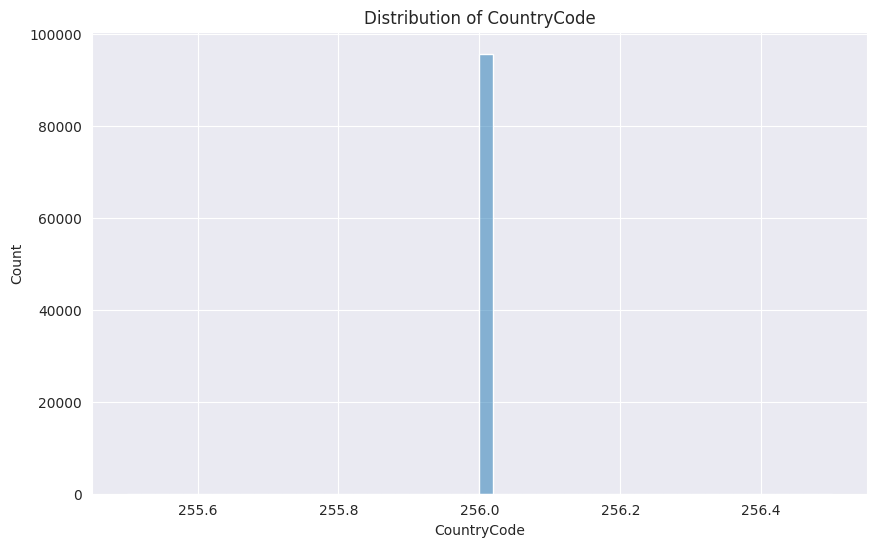

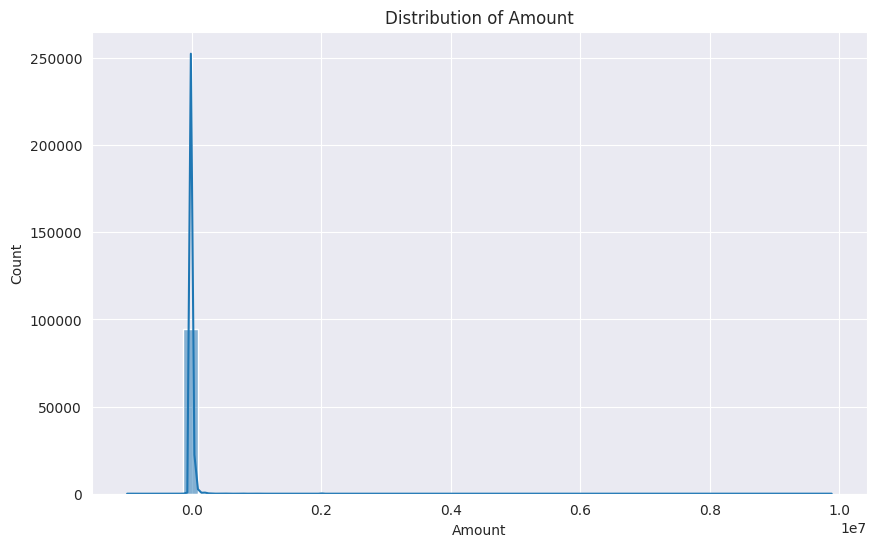

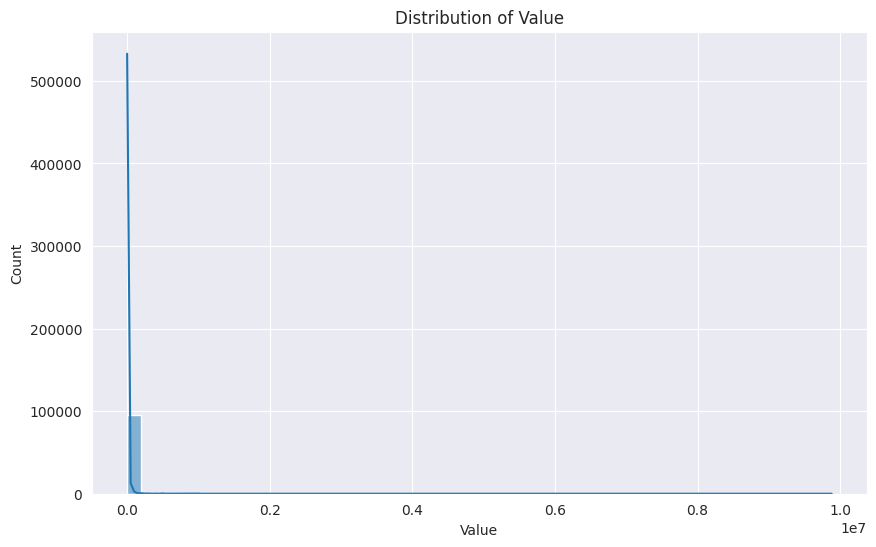

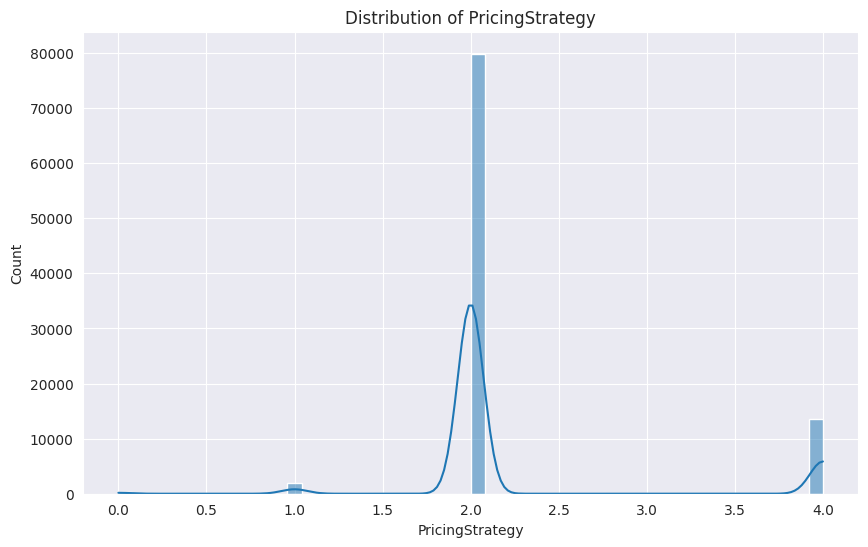

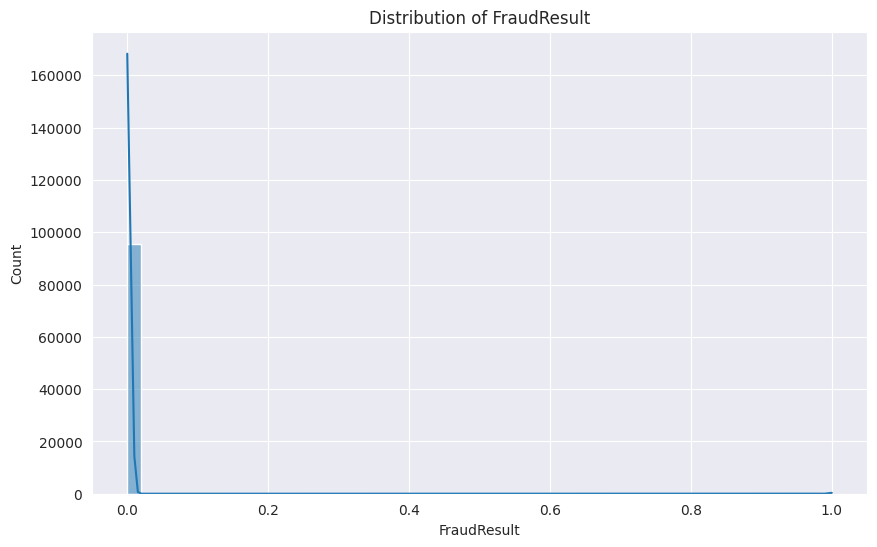

In [11]:
from scripts.creditRiskAnalysisImpl import distOfNumericalColumns
distOfNumericalColumns(data,numerical_columns)


Check the Skewness value of numerical columns

In [12]:
for col in numerical_columns:
    print (f'Skew Value of {col} {data[col].skew()} \n\n')


Skew Value of CountryCode 0.0 


Skew Value of Amount 51.098489522819115 


Skew Value of Value 51.29108598736249 


Skew Value of PricingStrategy 1.6590573072757961 


Skew Value of FraudResult 22.196294806589147 




Amount, Value and Fraud Result columns have high skew value

### Distribution of Categorical Features

Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [13]:
# Identify categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')


Distribution of many values column

In [14]:
print(data['AccountId'].value_counts())


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         1
Name: count, Length: 3633, dtype: int64


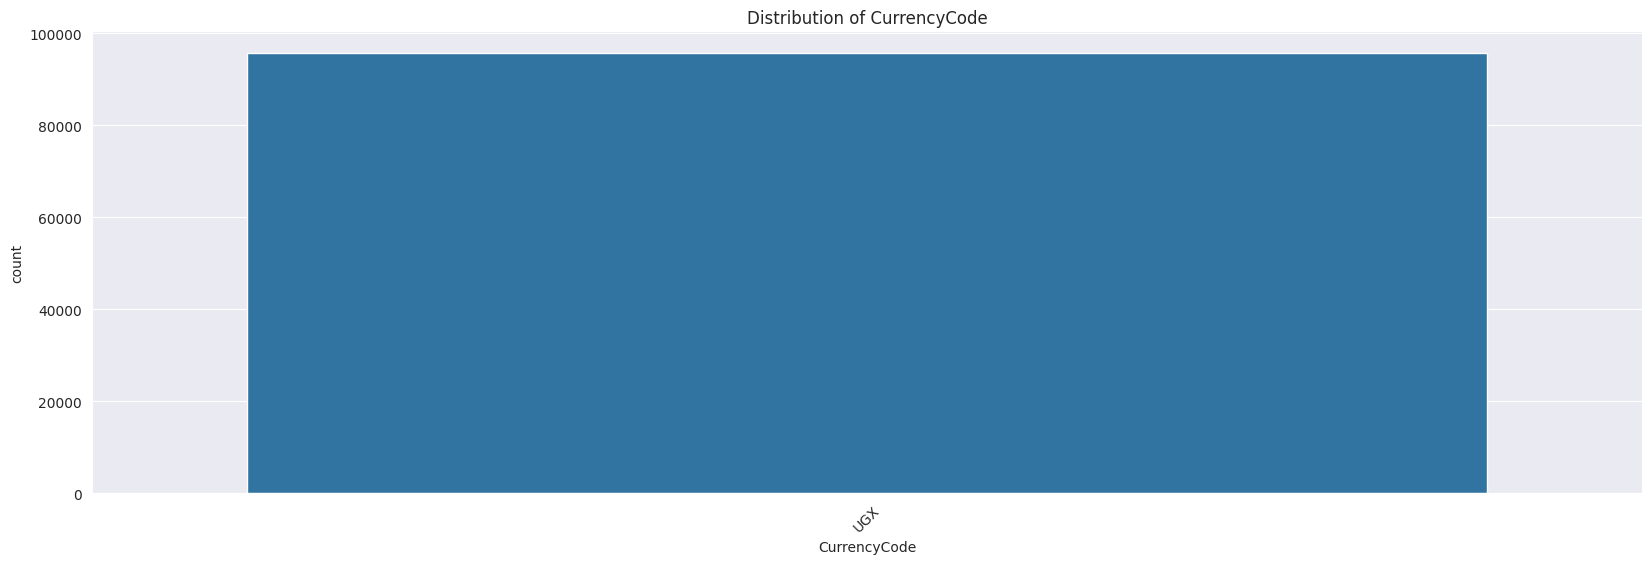

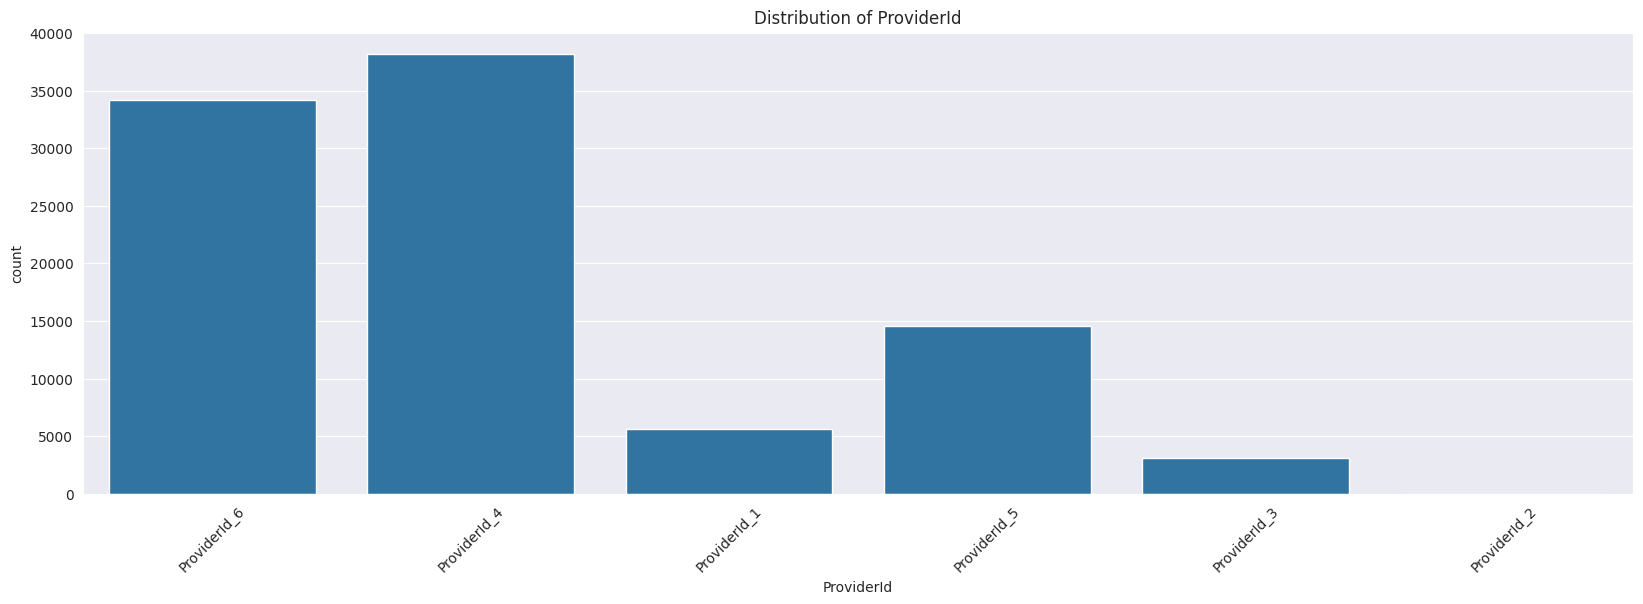

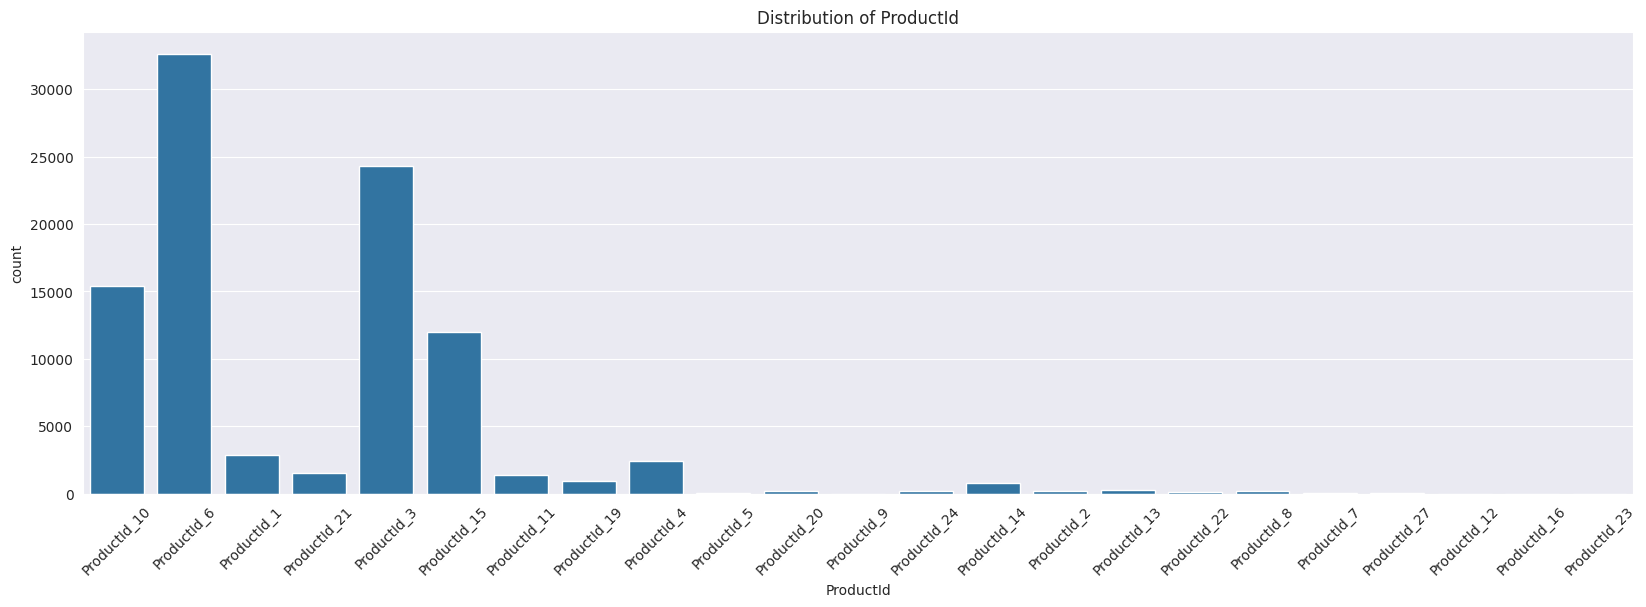

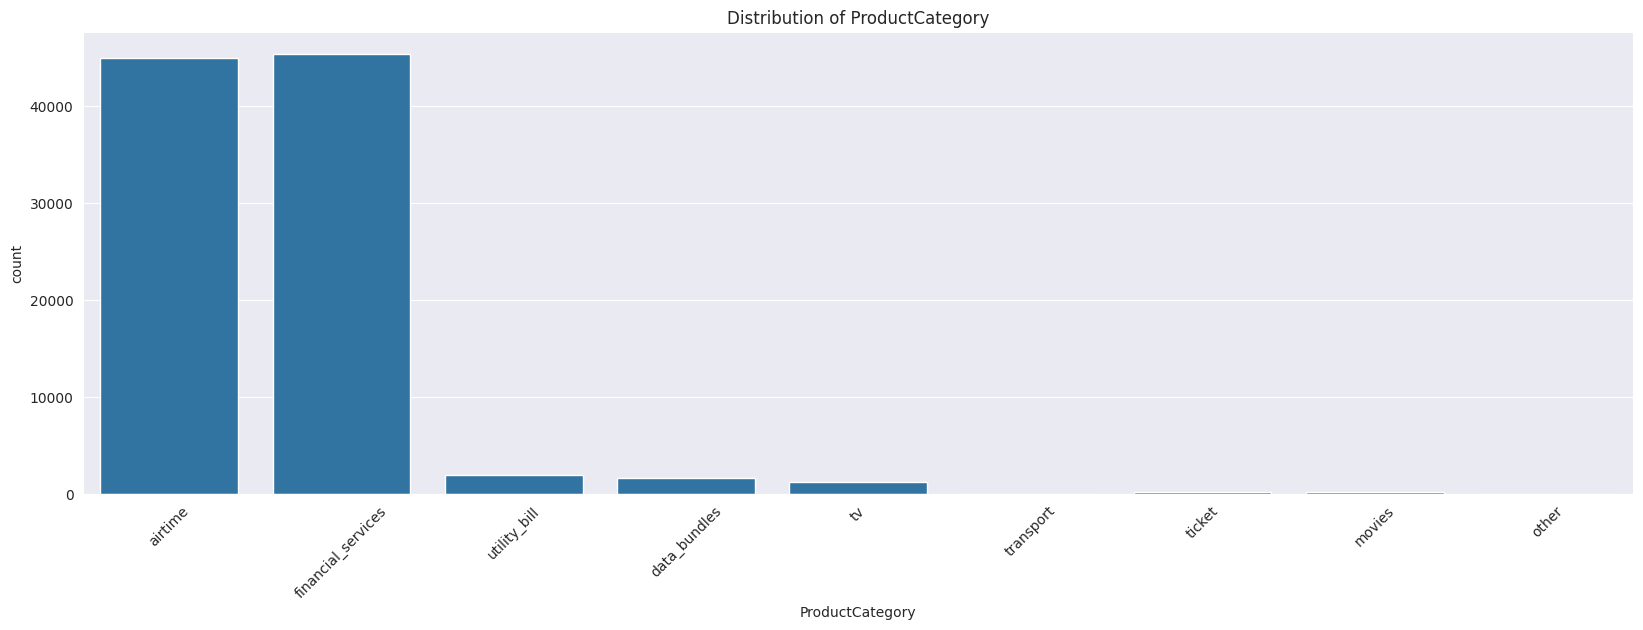

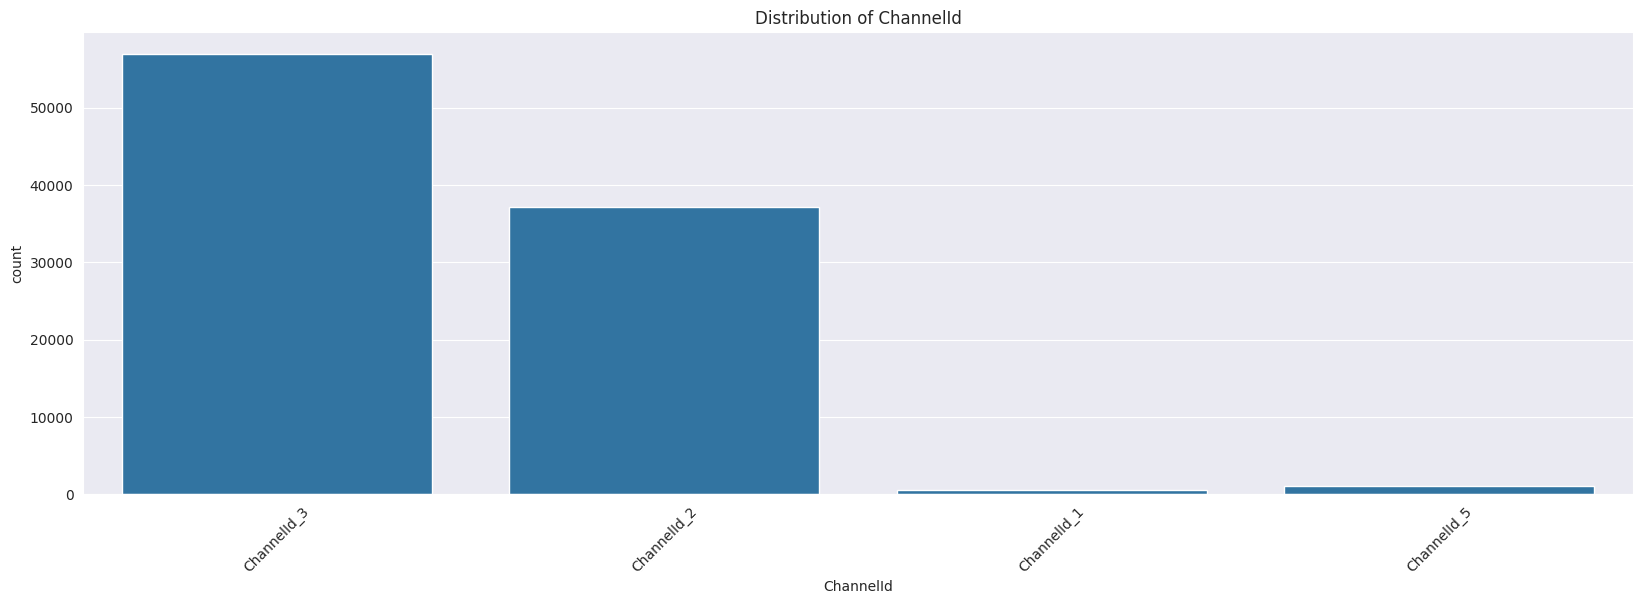

In [15]:
from scripts.creditRiskAnalysisImpl import distOfCategoricalColumns
distOfCategoricalColumns(data,['CurrencyCode','ProviderId','ProductId','ProductCategory','ChannelId'])


### Correlation Analysis

To Understanding the relationship between numerical features.


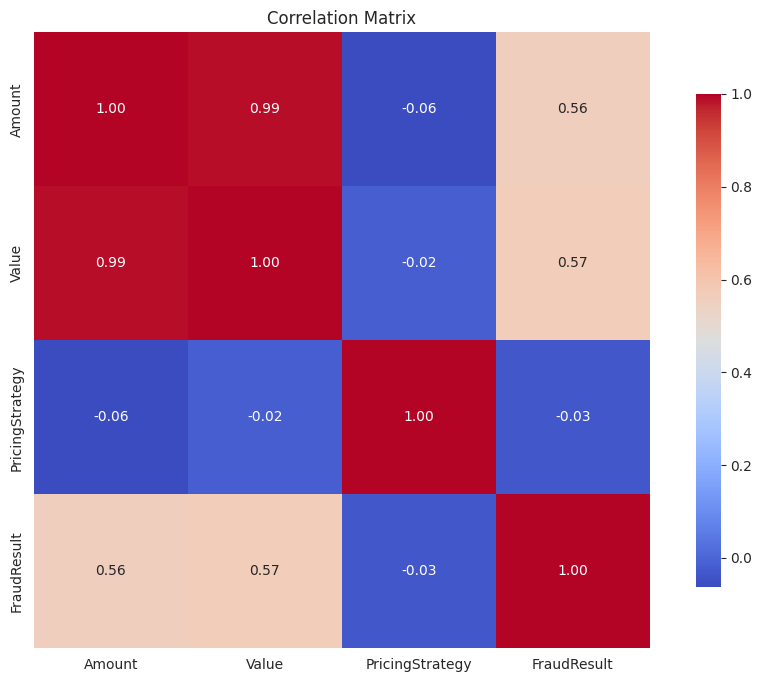

In [16]:
from scripts.creditRiskAnalysisImpl import correlationOfNumColumns
correlationOfNumColumns(data)


### Identifying Missing Values

Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [17]:
from scripts.creditRiskAnalysisImpl import find_missing_values
find_missing_values(data)


From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


The Datasets have no missing values

### Outlier Detection

Using box plots to identify outliers.

From Numerical Columns Amount and Value have Outliers

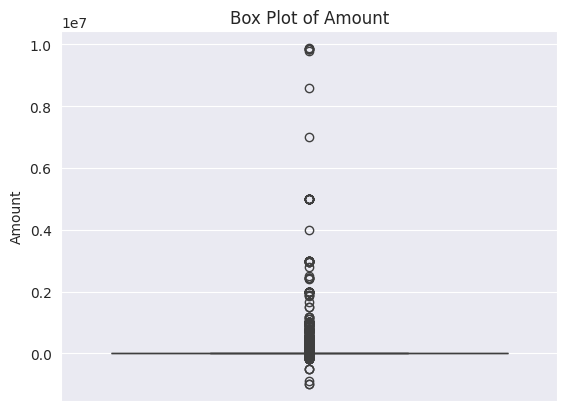

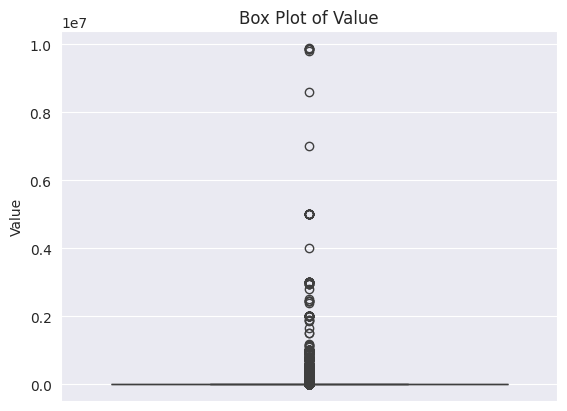

In [18]:
from scripts.creditRiskAnalysisImpl import boxPlotForDetectOutliers
boxPlotForDetectOutliers(data,['Amount','Value'])


## Remove outliers

In [19]:
from scripts.creditRiskAnalysisImpl import remove_outliers_winsorization
data=remove_outliers_winsorization(data, ['Amount','Value'])


In [20]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


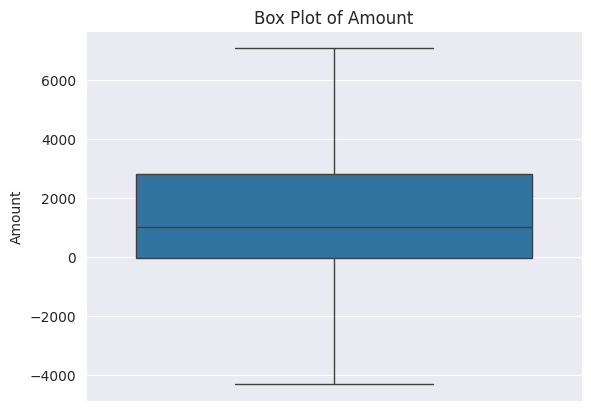

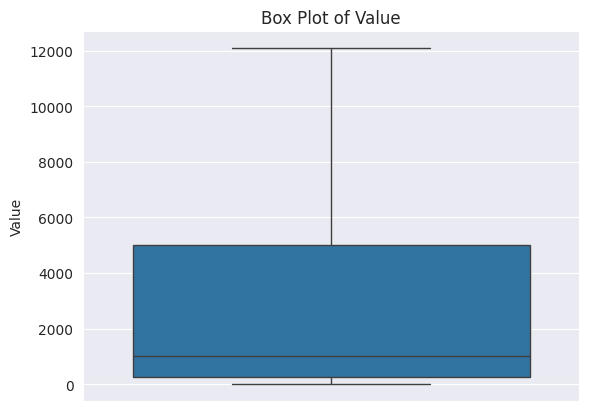

In [21]:
boxPlotForDetectOutliers(data,['Amount','Value'])


# Feature Engineering

### Aggregate Features

In [22]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


In [23]:
data.shape


(95662, 16)

In [24]:
from scripts.creditRiskAnalysisImpl import aggregateFeatures
agg_data = aggregateFeatures(data)
new_dataframe = pd.merge(data, agg_data, on='AccountId', how='left')
new_dataframe.head(10)



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0,136109.0,2062.257576,66,1928.782855
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0,-24212085.0,-783.740168,30893,1543.796173
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0,1000.0,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0,101600.0,3907.692308,26,2756.254426
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0,-24212085.0,-783.740168,30893,1543.796173
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,2018-11-15T03:35:10Z,2,0,2000.0,2000.000000,1,NaN
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,7075.0,10000.0,2018-11-15T03:44:31Z,4,0,84050.0,4669.444444,18,2127.231623
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500.0,2018-11-15T03:45:13Z,2,0,-24212085.0,-783.740168,30893,1543.796173
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500.0,2018-11-15T04:14:59Z,2,0,8200.0,2733.333333,3,3696.394640
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600.0,2018-11-15T04:31:48Z,2,0,13800.0,2300.000000,6,1862.256696


In [25]:
new_dataframe.shape


(95662, 20)

### Extract Date and Time Features

In [26]:
from scripts.creditRiskAnalysisImpl import extractDateAndTime
new_dataframe=extractDateAndTime(new_dataframe)
new_dataframe[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head(10)


,TransactionStartTime,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018
5,2018-11-15 03:35:10+00:00,3,15,11,2018
6,2018-11-15 03:44:31+00:00,3,15,11,2018
7,2018-11-15 03:45:13+00:00,3,15,11,2018
8,2018-11-15 04:14:59+00:00,4,15,11,2018
9,2018-11-15 04:31:48+00:00,4,15,11,2018


### Encoding Categorical Variables

 using One-Hot Encoding for categorical features

Exclude Unique Identifiers and Timestamps: TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, and TransactionStartTime, which are unique identifiers or timestamps.These columns may not provide useful information for our model and can unnecessarily increase the dimensionality of your dataset.

Keep Only Meaningful Categorical Columns: Focus on columns such as CurrencyCode, ProviderId, ProductId, ProductCategory, and ChannelId.

In [27]:
new_dataframe.columns


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'StdTransactionAmount', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionYear'],
      dtype='object')

In [28]:
import re
new_dataframe['ProviderId'] = new_dataframe['ProviderId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [29]:
new_dataframe['ProductId'] = new_dataframe['ProductId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [30]:
new_dataframe['ChannelId'] = new_dataframe['ChannelId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [31]:
new_dataframe.tail(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
95652,TransactionId_71994,BatchId_66957,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,1,15,financial_services,...,2,0,66570.0,2295.517241,29,2177.991926,9,13,2,2019
95653,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95654,TransactionId_18130,BatchId_20310,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,6,1,airtime,...,2,0,66570.0,2295.517241,29,2177.991926,9,13,2,2019
95655,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95656,TransactionId_68402,BatchId_17092,AccountId_2659,SubscriptionId_3327,CustomerId_3078,UGX,256,6,10,airtime,...,2,0,740850.0,2389.838710,310,2069.208486,9,13,2,2019
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,6,10,airtime,...,2,0,54358.0,2013.259259,27,1824.096902,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,6,19,tv,...,2,0,777625.0,2221.785714,350,2282.101347,10,13,2,2019
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,10,13,2,2019


In [32]:
pd.set_option('display.max_columns',None)
from scripts.creditRiskAnalysisImpl import encodingCategoricalVariables
new_dataframe_encoded = encodingCategoricalVariables(new_dataframe)
new_dataframe_encoded.head()



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handling Missing Values

The given datasets have no any missing values

### Normalization of Numerical Features

Normalization: Rescale the numerical features to the range [0, 1] using MinMaxScaler

In [33]:
new_dataframe_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   ProviderId                          95662 non-null  int64              
 7   ProductId                           95662 non-null  int64              
 8   ChannelId                           95662 non-null  int64              
 9   Amount                              956

In [34]:
numerical_columns_new=new_dataframe_encoded.select_dtypes(include=['float64', 'int64','int32']).columns


In [35]:
print(numerical_columns_new)


Index(['CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy', 'FraudResult', 'TotalTransactionAmount',
       'AverageTransactionAmount', 'TransactionCount', 'StdTransactionAmount',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill'],
      dtype='object')


In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
new_dataframe_encoded_normalize = min_max_scaler.fit_transform(new_dataframe_encoded[numerical_columns_new])


In [37]:
# Convert the normalized data to a DataFrame with the original column names
normalized_df = pd.DataFrame(new_dataframe_encoded_normalize, columns=numerical_columns_new)

df_normalized = normalized_df.copy()
df_normalized[numerical_columns_new] = normalized_df


print("Normalized DataFrame:")
df_normalized.head(10)



Normalized DataFrame:


,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,0.0,1.0,0.346154,0.50,0.467105,0.082578,0.5,0.0,0.929479,0.560286,0.002104,0.414861,0.086957,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.6,0.192308,0.25,0.377632,0.001489,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.086957,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.000000,0.50,0.423246,0.041206,0.5,0.0,0.924321,0.423246,0.000032,0.000000,0.086957,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.769231,0.50,1.000000,1.000000,0.5,0.0,0.928161,0.722166,0.000809,0.592841,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.6,0.192308,0.25,0.322895,0.053122,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.130435,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.076923,0.50,0.554825,0.165322,0.5,0.0,0.924359,0.554825,0.000000,NaN,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.8,0.076923,0.50,1.000000,0.827272,1.0,0.0,0.927492,0.788986,0.000550,0.457545,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.6,0.192308,0.25,0.335526,0.041206,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.130435,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.346154,0.50,0.423246,0.041206,0.5,0.0,0.924596,0.619152,0.000065,0.795056,0.173913,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.538462,0.50,0.432018,0.049481,0.5,0.0,0.924810,0.581140,0.000162,0.400552,0.173913,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_normalized['FraudResult'].value_counts()


FraudResult
0.0    95469
1.0      193
Name: count, dtype: int64

# Default estimator and WoE binning 

A Default Estimator was developed based on the RFMS formalism. Users were scored based on Recency, Frequency, Monetary value, and Seasonality of their transactions.Then classified users as Good or Bad using an RFMS threshold and applied Weight of Evidence (WoE) Binning to assess feature importance.

RFMS Calculation: Combined Recency, Frequency, Monetary, and Seasonality to derive an overall score.
Default Estimation: Classified users based on their RFMS score.
WoE Binning: Calculated Weight of Evidence to evaluate the predictive power of RFMS

Recency: How recent a user's last transaction was.
Frequency: How often a user has transacted.
Monetary: The total amount of money spent by the user.
Seasonality: A pattern in user transactions related to time (for example, higher activity during a specific time of year).

In [39]:
new_dataframe_encoded.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,256,6,3,3,2000.0,2000.0,2018-11-15 03:35:10+00:00,2,0,2000.0,2000.000000,1,NaN,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,256,5,3,3,7075.0,10000.0,2018-11-15 03:44:31+00:00,4,0,84050.0,4669.444444,18,2127.231623,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,256,4,6,2,-500.0,500.0,2018-11-15 03:45:13+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,256,6,10,3,500.0,500.0,2018-11-15 04:14:59+00:00,2,0,8200.0,2733.333333,3,3696.394640,4,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,256,1,15,3,600.0,600.0,2018-11-15 04:31:48+00:00,2,0,13800.0,2300.000000,6,1862.256696,4,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate RFMS Scores

In [40]:
from scripts.creditRiskAnalysisImpl import calculateRFMSscores
rfms_new_dataframe_encoded = calculateRFMSscores(new_dataframe_encoded)
print(rfms_new_dataframe_encoded[['Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_Score']].head(10))


                 Recency  Frequency  Monetary  Seasonality    RFMS_Score
CustomerId                                                              
CustomerId_1          83          1   -4325.0     4.000000  -4403.000000
CustomerId_10         83          1   -4325.0     4.000000  -4403.000000
CustomerId_1001       89          5   14825.0     4.000000  14745.000000
CustomerId_1002       25         11    4225.0     3.181818   4214.181818
CustomerId_1003       11          6   14825.0     1.000000  14821.000000
CustomerId_1004       52          1    2000.0     4.000000   1953.000000
CustomerId_1005       46          9   34850.0     4.000000  34817.000000
CustomerId_1006       64          1    1000.0     4.000000    941.000000
CustomerId_1007       81          1    7075.0     4.000000   6999.000000
CustomerId_1008       65          2   14150.0     4.000000  14091.000000


### Visualize the RFMS Score

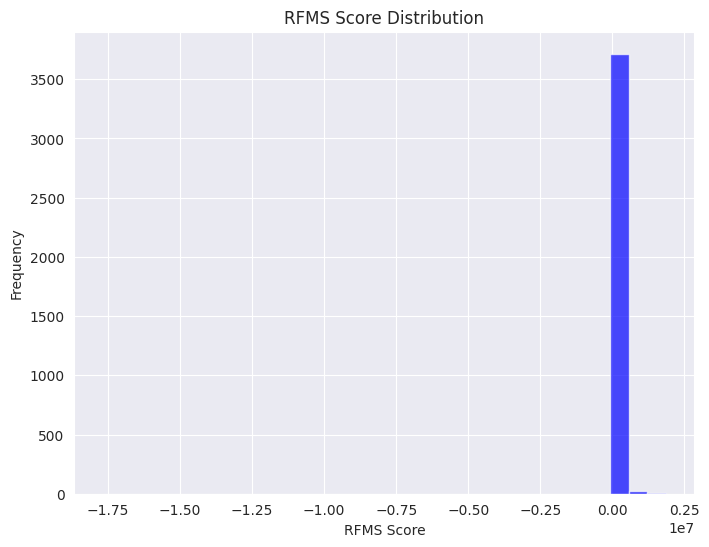

In [41]:
from scripts.creditRiskAnalysisImpl import visualizeRFMSscore
visualizeRFMSscore(rfms_new_dataframe_encoded)


### Perform Weight of Evidence (WoE) Binning

Merge RFMS scores back into the original dataset on 'CustomerId'

In [42]:
new_dataframe_with_rfms = new_dataframe_encoded.merge(rfms_new_dataframe_encoded[['Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_Score']], 
                                                      on='CustomerId', how='left')

new_dataframe_with_rfms.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Season,Recency,Frequency,Monetary,Seasonality,RFMS_Score
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,119,93196.75,3.243697,93318.993697
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,119,93196.75,3.243697,93318.993697
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,81,2,1000.00,4.000000,925.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5,38,86352.20,2.815789,86388.015789
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,38,86352.20,2.815789,86388.015789


In [43]:
print(new_dataframe_with_rfms.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'StdTransactionAmount', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionYear',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill', 'Season',
       'Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_Score'],
      dtype='object')


In [44]:
new_dataframe_with_rfms['Default_Estimator'] = np.where(new_dataframe_with_rfms['RFMS_Score'] >=new_dataframe_with_rfms['RFMS_Score'].median() , 1, 0)
print(new_dataframe_with_rfms[['RFMS_Score', 'Default_Estimator']].head(10))


     RFMS_Score  Default_Estimator
0  93318.993697                  0
1  93318.993697                  0
2    925.000000                  0
3  86388.015789                  0
4  86388.015789                  0
5   1915.000000                  0
6  67902.275862                  0
7  67902.275862                  0
8   7980.000000                  0
9  13710.000000                  0


In [45]:
from scripts.creditRiskAnalysisImpl import calculate_woe_iv
# Perform WoE binning
woe_iv_df = calculate_woe_iv(new_dataframe_with_rfms.reset_index(), 'RFMS_Score', 'Default_Estimator')
new_dataframe_with_rfms['WoE_RFMS'] = new_dataframe_with_rfms['RFMS_Score'].map(woe_iv_df.set_index('Value')['WoE'])


In [46]:
print(woe_iv_df)


             Value       WoE        IV
0     93318.993697 -3.215625  0.007691
1       925.000000  0.464886  0.000017
2     86388.015789 -2.074087  0.001443
3      1915.000000  0.870351  0.000051
4     67902.275862 -1.803797  0.000915
...            ...       ...       ...
2853   5002.000000  0.870351  0.000051
2854  15165.000000 -0.382411  0.000018
2855   2005.000000  0.177204  0.000003
2856   6473.000000  0.177204  0.000003
2857   2002.000000  1.563499  0.000124

[2858 rows x 3 columns]


In [47]:
new_dataframe_with_rfms.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Season,Recency,Frequency,Monetary,Seasonality,RFMS_Score,Default_Estimator,WoE_RFMS
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,119,93196.75,3.243697,93318.993697,0,-3.215625
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,119,93196.75,3.243697,93318.993697,0,-3.215625
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,81,2,1000.00,4.000000,925.000000,0,0.464886
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5,38,86352.20,2.815789,86388.015789,0,-2.074087
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,38,86352.20,2.815789,86388.015789,0,-2.074087
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,256,6,3,3,2000.0,2000.0,2018-11-15 03:35:10+00:00,2,0,2000.0,2000.000000,1,NaN,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,90,1,2000.00,4.000000,1915.000000,0,0.870351
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,256,5,3,3,7075.0,10000.0,2018-11-15 03:44:31+00:00,4,0,84050.0,4669.444444,18,2127.231623,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,29,67875.00,3.275862,67902.275862,0,-1.803797
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,256,4,6,2,-500.0,500.0,2018-11-15 03:45:13+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,29,67875.00,3.275862,67902.275862,0,-1.803797
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,256,6,10,3,500.0,500.0,2018-11-15 04:14:59+00:00,2,0,8200.0,2733.333333,3,3696.394640,4,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,88,4,8060.00,4.000000,7980.000000,0,0.177204
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,256,1,15,3,600.0,600.0,2018-11-15 04:31:48+00:00,2,0,13800.0,2300.000000,6,1862.256696,4,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,89,7,13788.00,4.000000,13710.000000,0,-0.382411


In [48]:
new_dataframe_with_rfms['Default_Estimator'].value_counts()


Default_Estimator
1    47907
0    47755
Name: count, dtype: int64

# Model Training

In [49]:
numerical_columns_new=new_dataframe_with_rfms.select_dtypes(include=['float64', 'int64','int32']).columns


In [50]:
new_dataframe_encoded_normalize = min_max_scaler.fit_transform(new_dataframe_with_rfms[numerical_columns_new])

# Convert the normalized data to a DataFrame with the original column names
normalized_df = pd.DataFrame(new_dataframe_encoded_normalize, columns=numerical_columns_new)

df_normalized = normalized_df.copy()
df_normalized[numerical_columns_new] = normalized_df


print("Normalized DataFrame:")
df_normalized.head(10)


Normalized DataFrame:


,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Season,Recency,Frequency,Monetary,Seasonality,RFMS_Score,Default_Estimator,WoE_RFMS
0,0.0,1.0,0.346154,0.50,0.467105,0.082578,0.5,0.0,0.929479,0.560286,0.002104,0.414861,0.086957,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.028851,0.909202,0.747899,0.909102,0.0,0.275739
1,0.0,0.6,0.192308,0.25,0.377632,0.001489,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.086957,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.028851,0.909202,0.747899,0.909102,0.0,0.275739
2,0.0,1.0,0.000000,0.50,0.423246,0.041206,0.5,0.0,0.924321,0.423246,0.000032,0.000000,0.086957,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.900000,0.000244,0.904489,1.000000,0.904379,0.0,0.562631
3,0.0,0.0,0.769231,0.50,1.000000,1.000000,0.5,0.0,0.928161,0.722166,0.000809,0.592841,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.055556,0.009046,0.908852,0.605263,0.908748,0.0,0.364720
4,0.0,0.6,0.192308,0.25,0.322895,0.053122,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.130435,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.055556,0.009046,0.908852,0.605263,0.908748,0.0,0.364720
5,0.0,1.0,0.076923,0.50,0.554825,0.165322,0.5,0.0,0.924359,0.554825,0.000000,NaN,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.904540,1.000000,0.904429,0.0,0.594237
6,0.0,0.8,0.076923,0.50,1.000000,0.827272,1.0,0.0,0.927492,0.788986,0.000550,0.457545,0.130435,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.055556,0.006846,0.907907,0.758621,0.907803,0.0,0.385789
7,0.0,0.6,0.192308,0.25,0.335526,0.041206,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.130435,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.055556,0.006846,0.907907,0.758621,0.907803,0.0,0.385789
8,0.0,1.0,0.346154,0.50,0.423246,0.041206,0.5,0.0,0.924596,0.619152,0.000065,0.795056,0.173913,0.466667,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.977778,0.000733,0.904850,1.000000,0.904739,0.0,0.540206
9,0.0,0.0,0.538462,0.50,0.432018,0.049481,0.5,0.0,0.924810,0.581140,0.000162,0.400552,0.173913,0.466667,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.988889,0.001467,0.905143,1.000000,0.905032,0.0,0.496585


In [51]:
df_normalized.columns


Index(['CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy', 'FraudResult', 'TotalTransactionAmount',
       'AverageTransactionAmount', 'TransactionCount', 'StdTransactionAmount',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'Season', 'Recency', 'Frequency',
       'Monetary', 'Seasonality', 'RFMS_Score', 'Default_Estimator',
       'WoE_RFMS'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(['FraudResult'], axis=1)
y = df_normalized['FraudResult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [53]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
# logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradientBoosting_model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)


In [54]:
gradientBoosting_model.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [55]:
# Train Random Forest
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params_rf = grid_search.best_params_
print(f"Best Random Forest Params: {best_params_rf}")

# Update Random Forest model with best hyperparameters
random_forest_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=gradientBoosting_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params_rf = grid_search.best_params_
print(f"Best Random Forest Params: {best_params_rf}")

# Update Random Forest model with best hyperparameters
gradientBoosting_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}


In [58]:
import joblib
joblib.dump(random_forest_model, 'credit_scoring_random_forest_model.pkl')
joblib.dump(gradientBoosting_model, 'credit_scoring_gradientBoosting_model.pkl')


['credit_scoring_gradientBoosting_model.pkl']

In [59]:
# Load the model from file
random_forest_model = joblib.load('credit_scoring_random_forest_model.pkl')
gradientBoosting_model = joblib.load('credit_scoring_gradientBoosting_model.pkl')


In [60]:
# Predict on the test data
gradientBoosting_model_preds = gradientBoosting_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)

# GradientBoosting Evaluation
print("Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, gradientBoosting_model_preds)}")
print(f"Precision: {precision_score(y_test, gradientBoosting_model_preds)}")
print(f"Recall: {recall_score(y_test, gradientBoosting_model_preds)}")
print(f"F1 Score: {f1_score(y_test, gradientBoosting_model_preds)}")
print(f"ROC-AUC: {roc_auc_score(y_test, gradientBoosting_model_preds)}")


# Random Forest Evaluation
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds)}")
print(f"Precision: {precision_score(y_test, rf_preds)}")
print(f"Recall: {recall_score(y_test, rf_preds)}")
print(f"F1 Score: {f1_score(y_test, rf_preds)}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_preds)}")


Gradient Boosting Metrics:
Accuracy: 0.9983129481231547
Precision: 0.6363636363636364
Recall: 0.2
F1 Score: 0.30434782608695654
ROC-AUC: 0.5998943643374003

Random Forest Metrics:
Accuracy: 0.9986292703500632
Precision: 0.7368421052631579
Recall: 0.4
F1 Score: 0.5185185185185185
ROC-AUC: 0.6998679554217504


# Model Serving API Call

In scripts/api.py